In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time, math
import scipy.stats as stats
import Visualization as visual

pd.set_option("display.max_columns", None)
data_set = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/original Data sets/train.csv"
)
test_df = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/original Data sets/test.csv"
)
data_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. understanding data set and columns:
            </span>   
        </font>    
</h2>


In [3]:
data_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
columns = data_set.columns

for col in columns:

    null_percetage = data_set[col].isnull().sum() / len(data_set) * 100

    if null_percetage > 40:
        print(col, " has ", null_percetage, " % null percetage")

Alley  has  93.76712328767123  % null percetage
MasVnrType  has  59.726027397260275  % null percetage
FireplaceQu  has  47.26027397260274  % null percetage
PoolQC  has  99.52054794520548  % null percetage
Fence  has  80.75342465753424  % null percetage
MiscFeature  has  96.30136986301369  % null percetage


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: any column has more than 40% missing values, will be removed</b><br>
    </span>    
</div>


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. SalePrice (Targer | Goal):
            </span>   
        </font>    
</h2>


In [6]:
data_set["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

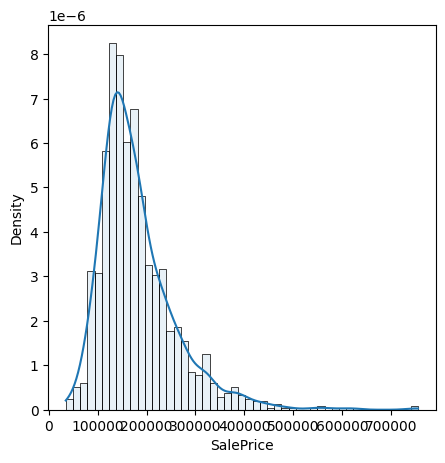

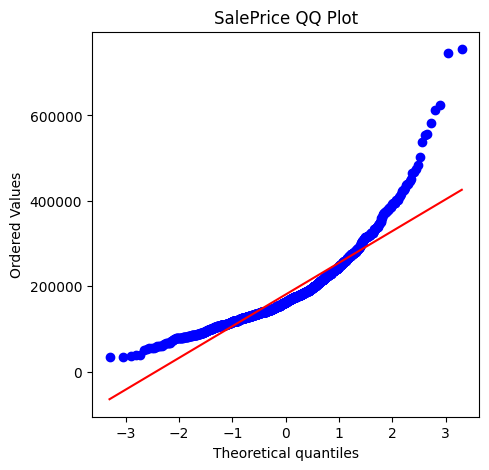

In [7]:
visual.price_histplot()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: Not normal distribution</b><br>
        <b>Insight: so it need to transform with log</b><br>
    </span>    
</div>


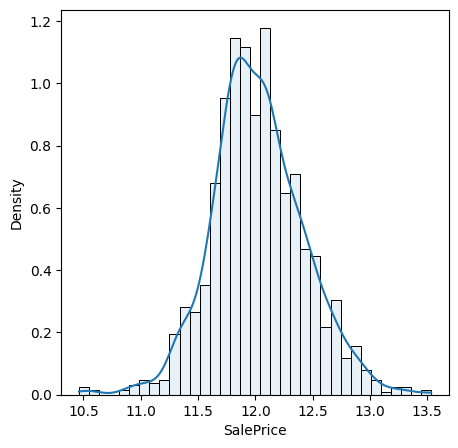

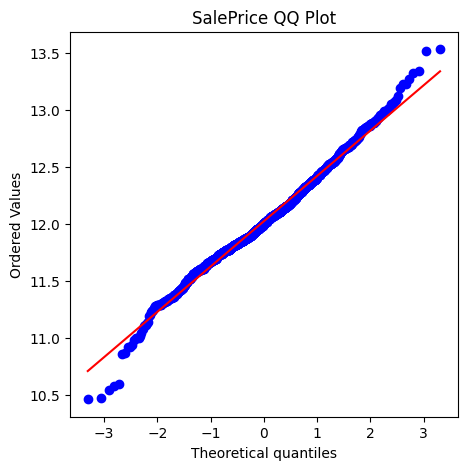

In [8]:
visual.price_histplot_log()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: we will log function transformer to make it with normal distibution </b><br>
    </span>    
</div>


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. MSZoning:
            </span>   
        </font>    
</h2>


MSZoning: Identifies the general zoning classification of the sale.


In [9]:
data_set["MSZoning"].isnull().sum() / len(data_set) * 100

0.0

/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/Analysis_part/Visualization.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


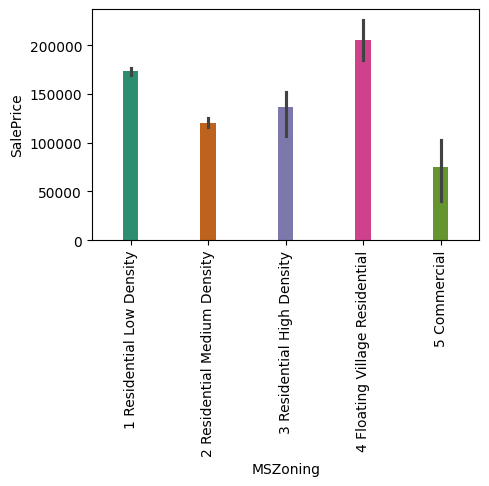

In [10]:
visual.MSZoning_bar_find_mean_Sales()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: There is no storng relation (increasing or decreasing) between SalePrice and MSZoning</b><br>
    </span>    
</div>


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. LotFrontage and LotArea:
            </span>   
        </font>    
</h2>


LotFrontage: Linear feet of street connected to property (size infront of house)

LotArea: Lot size in square feet (house size)


In [11]:
print(data_set["LotFrontage"].isna().sum() / len(data_set) * 100)
print(data_set["LotArea"].isna().sum() / len(data_set) * 100)

17.73972602739726
0.0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: in LotFrontage, there is about 16% missing value, not to much, we will use mean with class methode to fill them</b><br>
    </span>    
</div>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


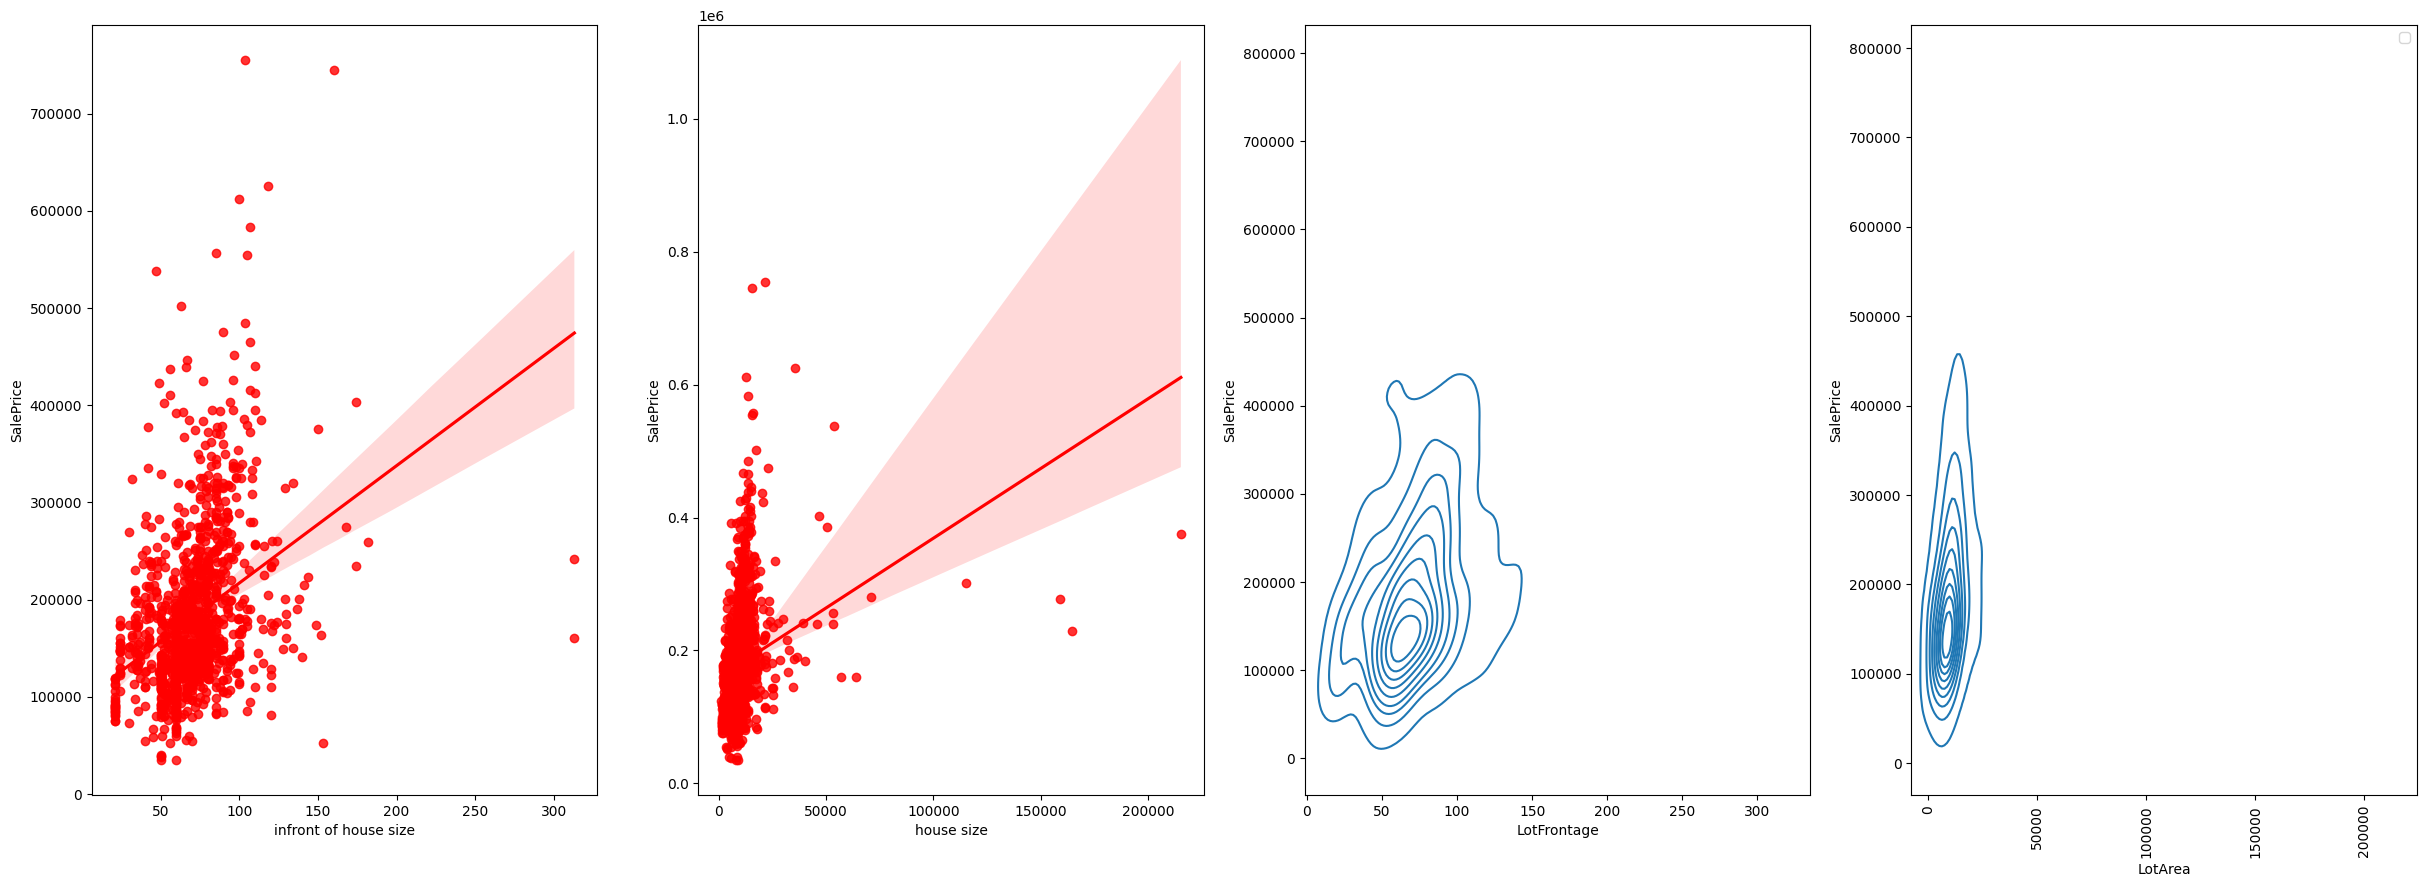

In [12]:
visual.relation_between_sizes_and_price()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: There is alot of outliers in both feature</b><br>
        <b>Insight: There is a little relation ship with each other  </b><br>
    </span>    
</div>


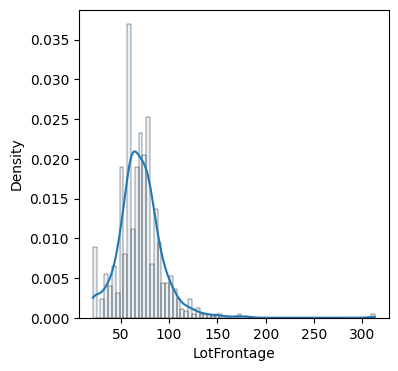

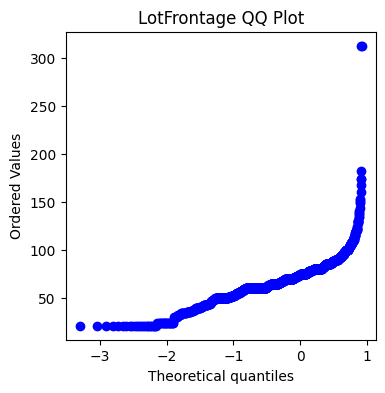

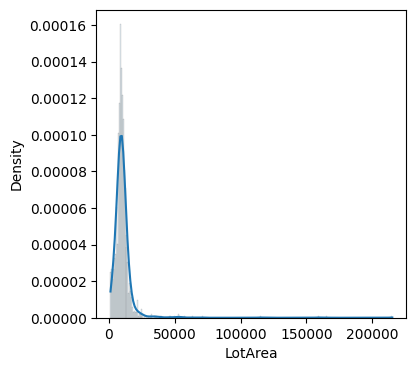

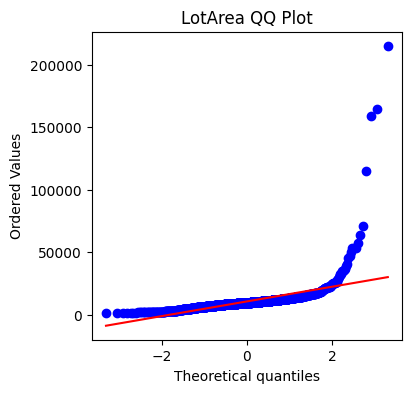

In [13]:
visual.sizes_histplot()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: it has a great skew, so it is need to be transformed with log</b><br>
    </span>    
</div>


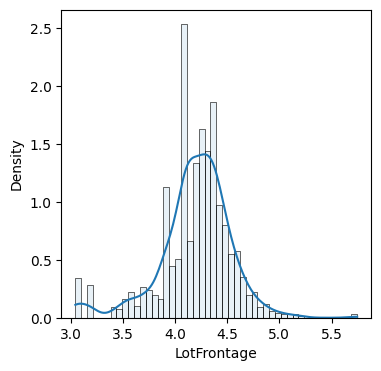

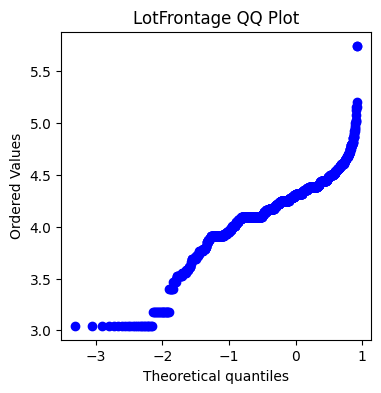

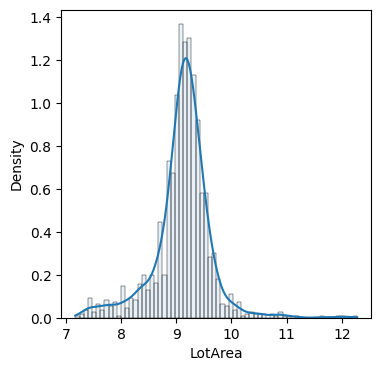

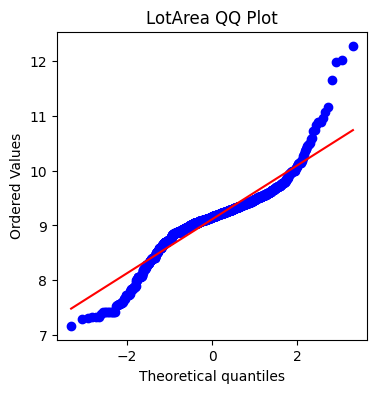

In [14]:
visual.sizes_histplot_log()

<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Street:
            </span>   
        </font>    
</h2>


In [15]:
print(data_set["Street"].isna().sum() / len(data_set) * 100)

0.0


/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/Analysis_part/Visualization.py:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


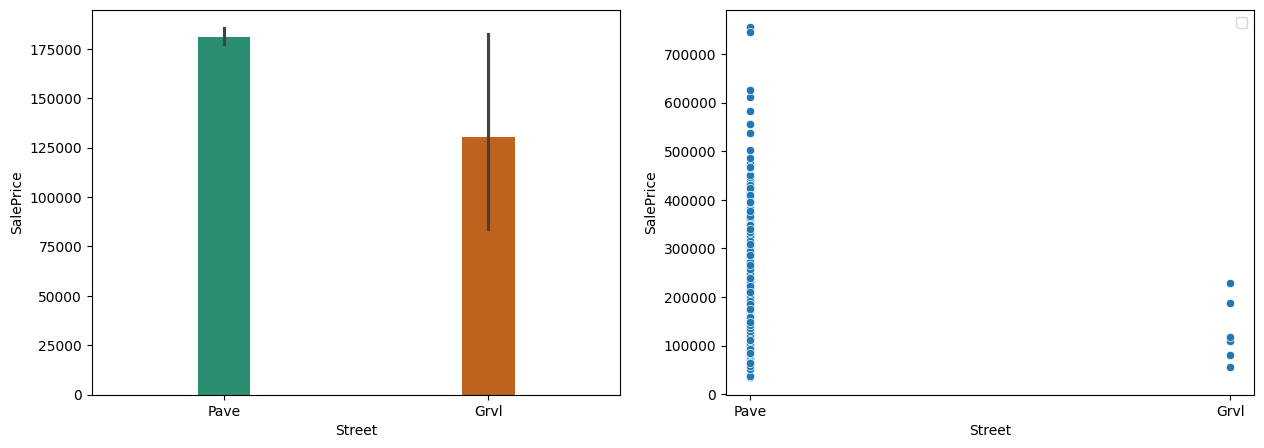

In [16]:
visual.street()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: houses with Pave street more expensive than Grvl </b><br>
        <b>Insight: will be use fill in model, but it need ordinal transforming, where pave > grvl </b><br>
    </span>    
</div>


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            5. LotShape and LandContour:
            </span>   
        </font>    
</h2>


LotShape (house shape)

LandContour (Flatness of the land of house)


In [17]:
print(data_set["LotShape"].isna().sum() / len(data_set) * 100)
print(data_set["LandContour"].isna().sum() / len(data_set) * 100)

0.0
0.0


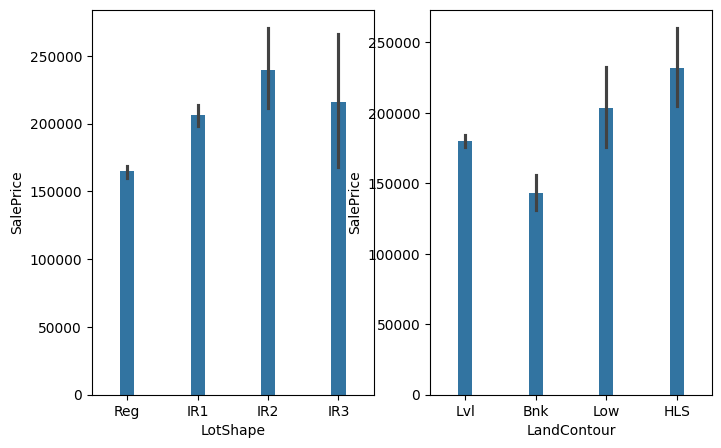

In [18]:
visual.land_and_shape()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: i'm really can't find any relation</b><br>
    </span>    
</div>


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            6. OverallQual, OverallCond:
            </span>   
        </font>    
</h2>


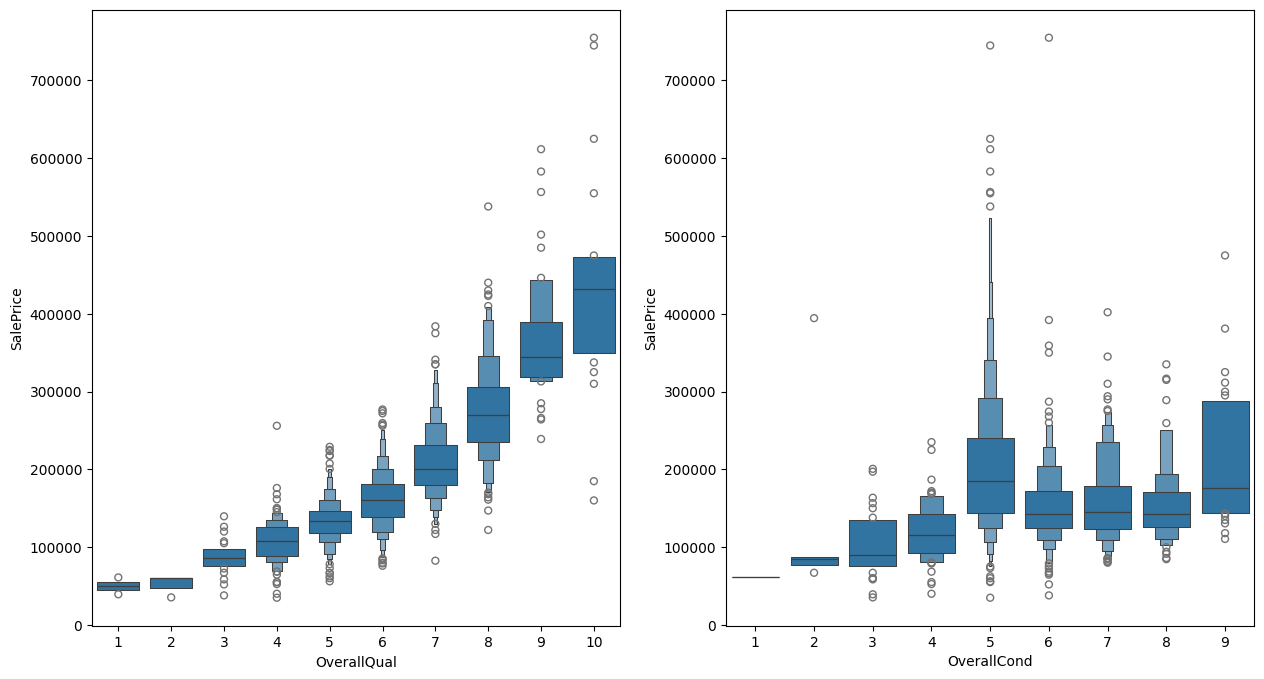

In [19]:
visual.quality()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: there is a increasing relation between price and quality </b><br>
    </span>    
</div>


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            7. Years:
            </span>   
        </font>    
</h2>


In [20]:
print(data_set["YearBuilt"].isnull().sum() / len(data_set))

0.0


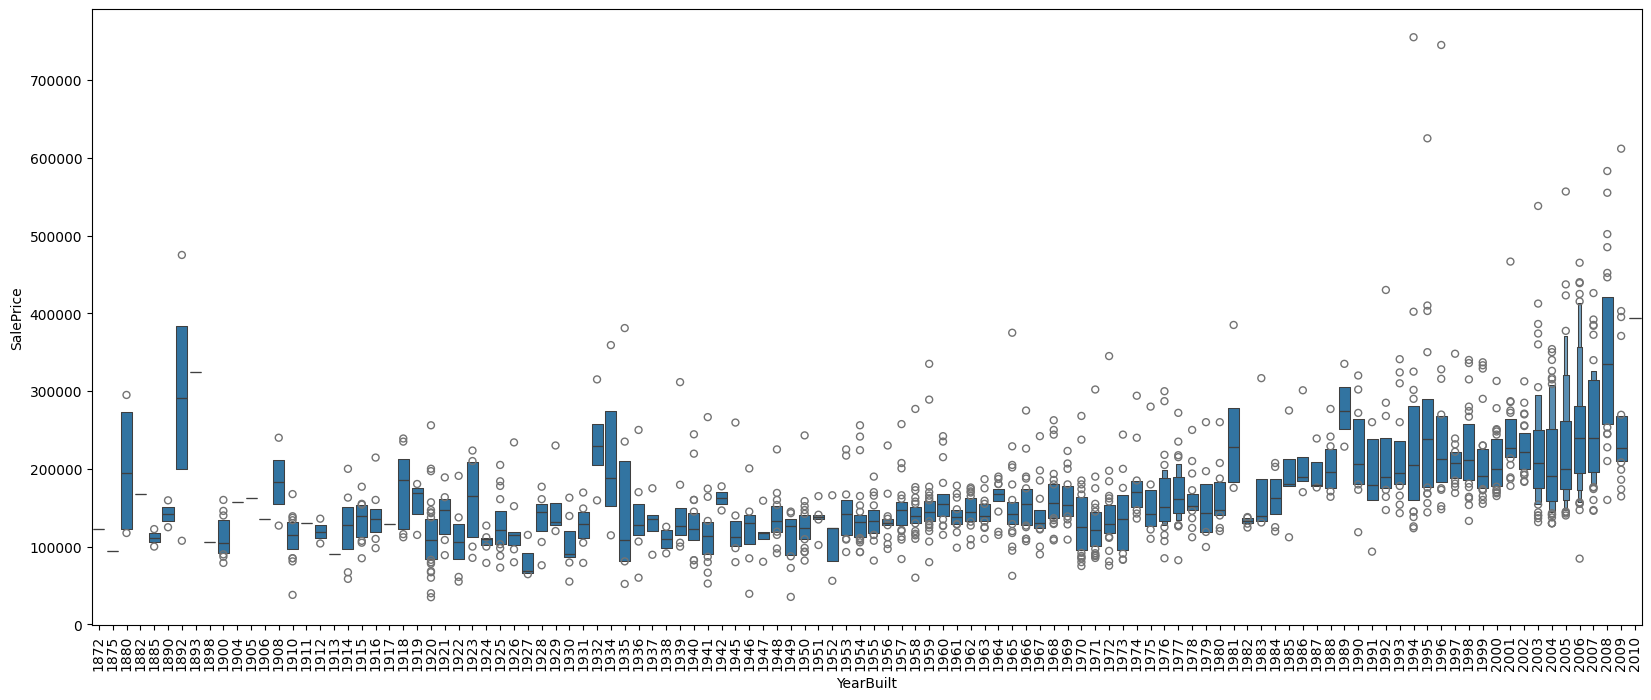

In [21]:
visual.year_built()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: in general when the year of built becomes early, that means that the price increaces</b><br>
        <b>Insight: we will use it but we should solve outlier problem</b><br>
</div>


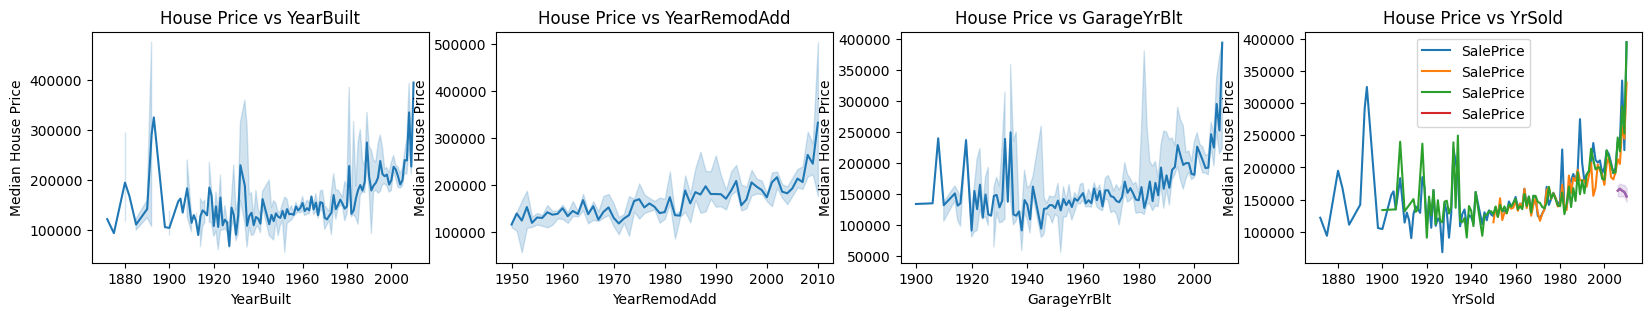

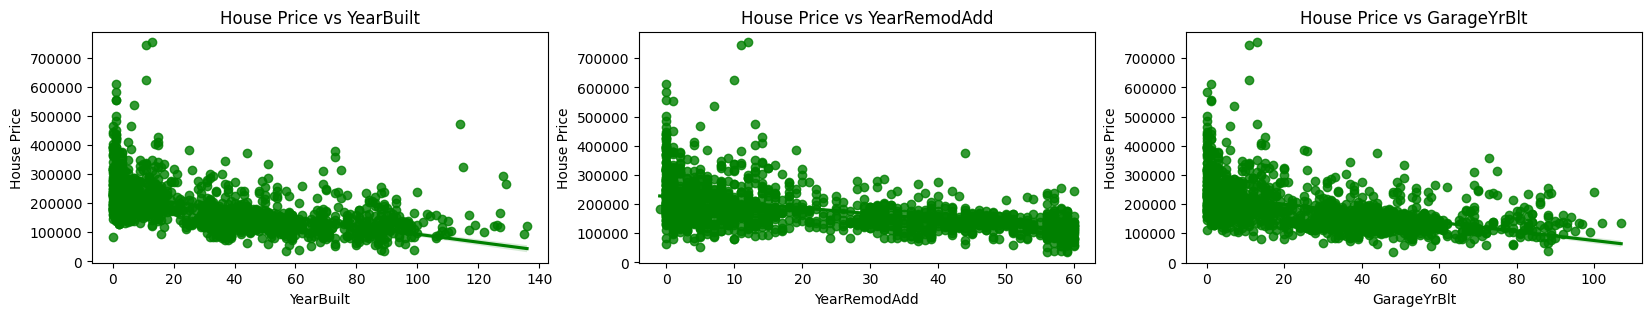

In [22]:
visual.years_vs_price()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: in general when the year of build or remodel or garage build your, becomes ealyer, this increace the house price</b><br>
        <b>Insight: we need to construct new column for difference between year variable and year the house was sold for</b><br>
    </span>    
</div>


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            8. basement:
            </span>   
        </font>    
</h2>


BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area


In [23]:
print(data_set["BsmtQual"].isna().sum() / len(data_set))
print(data_set["BsmtCond"].isna().sum() / len(data_set))
print(data_set["BsmtFinSF1"].isna().sum() / len(data_set))
print(data_set["BsmtFinSF2"].isna().sum() / len(data_set))
print(data_set["BsmtUnfSF"].isna().sum() / len(data_set))
print(data_set["TotalBsmtSF"].isna().sum() / len(data_set))

0.025342465753424658
0.025342465753424658
0.0
0.0
0.0
0.0


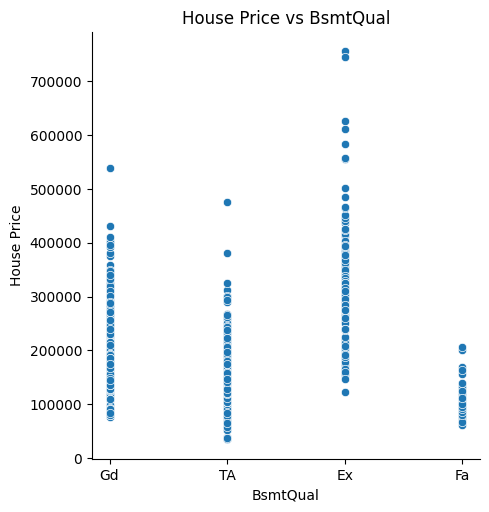

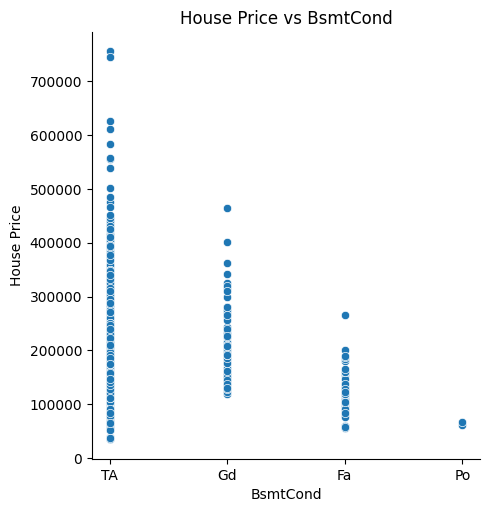

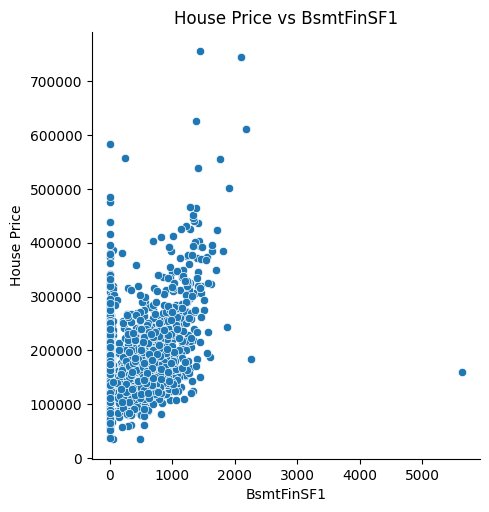

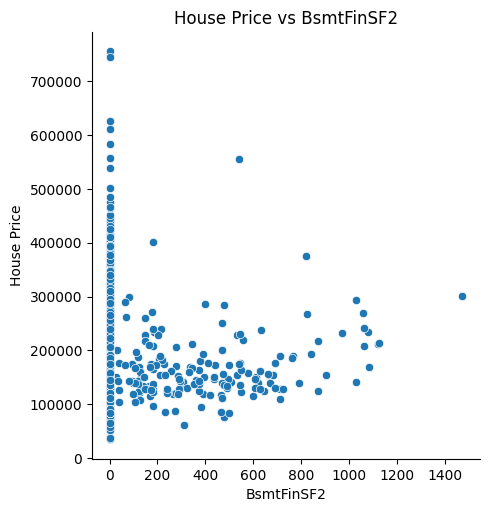

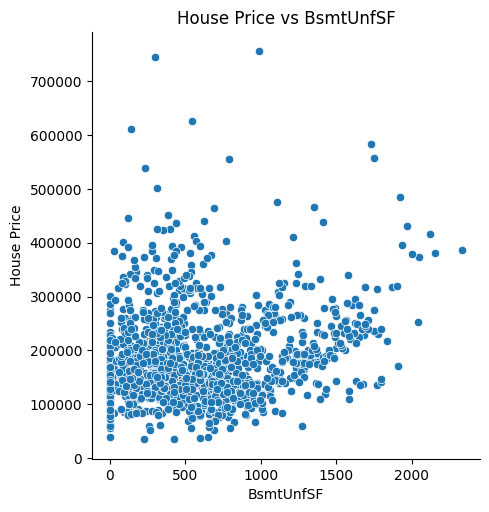

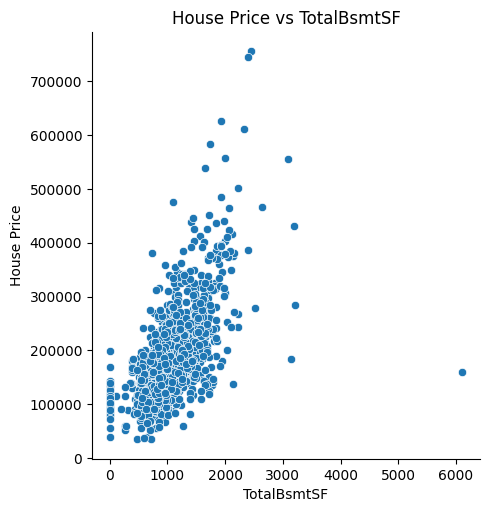

In [24]:
visual.basement()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: there is a relation between TotalBsmtSF and BsmtQual, with price</b><br>
    </span>    
</div>


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            9. Heating & HeatingQC & CentralAir:
            </span>   
        </font>    
</h2>


Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning


In [25]:
print(data_set["Heating"].isna().sum() / len(data_set))
print(data_set["HeatingQC"].isna().sum() / len(data_set))
print(data_set["CentralAir"].isna().sum() / len(data_set))

0.0
0.0
0.0


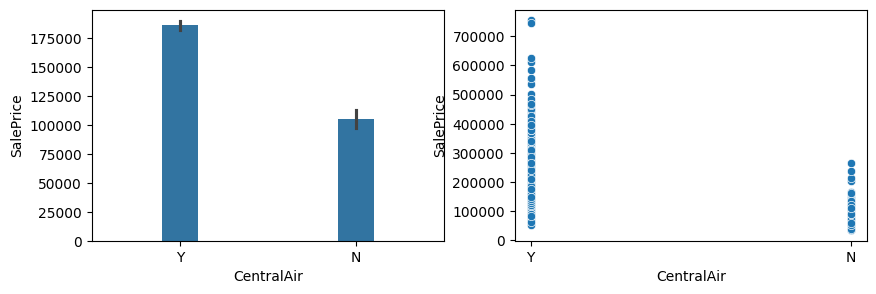

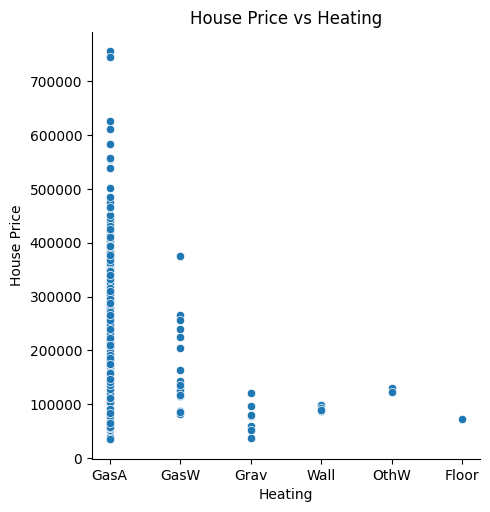

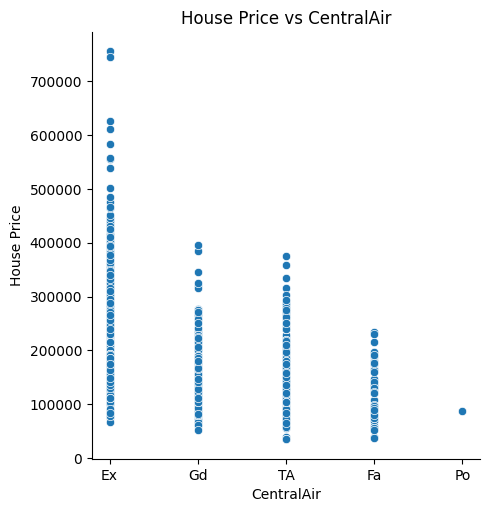

In [26]:
visual.temprature()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: CentralAir and Heating have a relation</b><br>
    </span>    
</div>


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            10. GrLivArea:
            </span>   
        </font>    
</h2>


GrLivArea: Above grade (ground) living area square feet


In [27]:
print(data_set["GrLivArea"].isna().sum() / len(data_set))

0.0


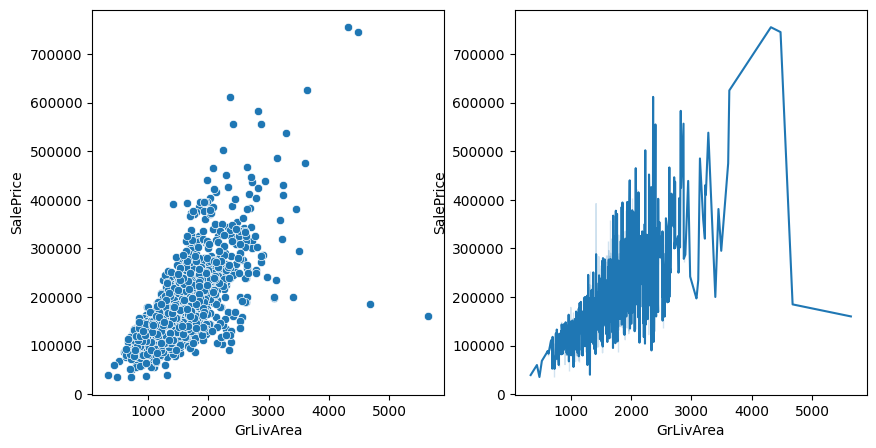

In [28]:
visual.garden_area()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: there is a relation, but we need to remove the outliers</b><br>
    </span>    
</div>


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            11. Garage:
            </span>   
        </font>    
</h2>


In [29]:
print(data_set["GarageCars"].isna().sum() / len(data_set))
print(data_set["GarageArea"].isna().sum() / len(data_set))

0.0
0.0


In [30]:
print(data_set["GarageCars"].value_counts())

GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64


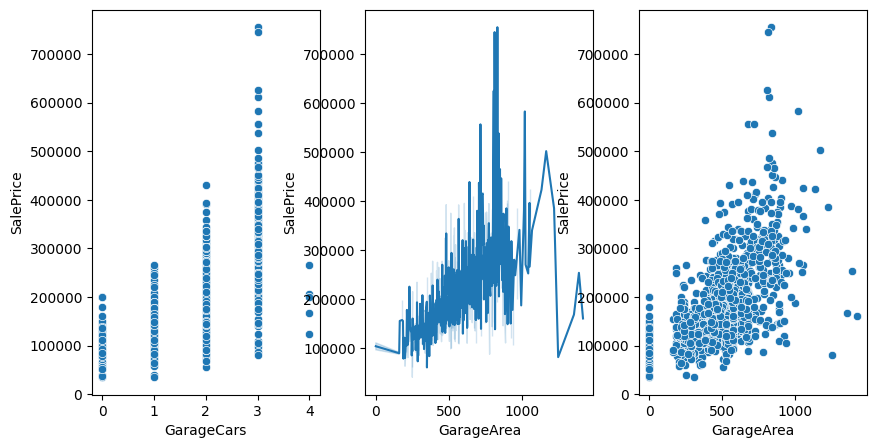

In [31]:
visual.garage()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: i think use garage cars is useless, but the are is good but there is an outliers we should deal with it</b><br>
    </span>    
</div>


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            12. WoodDeckSF:
            </span>   
        </font>    
</h2>


In [32]:
print(data_set["WoodDeckSF"].isna().sum() / len(data_set))

0.0


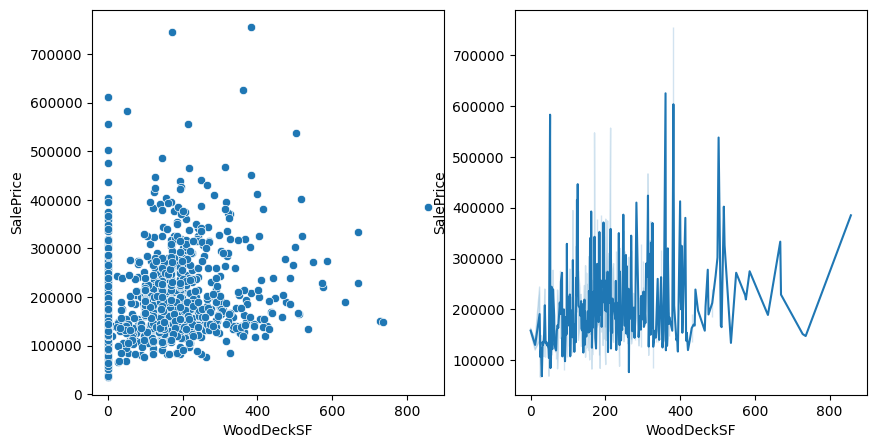

In [33]:
visual.wood_deck_area()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: there is a relation, but we need to remove the outliers</b><br>
    </span>    
</div>


# End


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            Conclusion And Summary:
            </span>   
        </font>    
</h2>


### 1) the column that will used in Ml model:

    [ SalePrice, LotFrontage, LotArea, Street, OverallQual, YearBuilt, year_columns, GarageYrBlt, BsmtQual, TotalBsmtSF, CentralAir, Heating, GrLivArea, WoodDeckSF ]

### 2) the continuous columns need to to labeled, all of them conceder ordinal problem, so i will use ordinal Encoding in them

### 3) There is tooooo much outliers, take care of them because of the underfitting problem


<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            Cleaning and transforming Strategy:
            </span>   
        </font>    
</h2>


<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Cleaning: </b> 
        <ul>
            <li>rename columns (all columns)</li>
            <li>fill missing values (LotFrontage, GarageYrBlt, GarageYrBlt, BsmtQual) with class mathod and estimation</li>
            <li>remove outliers</li>
        </ul>       
    </span>    
</div>


<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Transforming and Scaling: </b> 
        <ul>
            <li>Street, CentralAir: nominal data, so that will transformed with One Hot Encoding</li>
            <li>BsmtQual, Heating: ordinal data, so that will transformed with Ordinal Encoding</li>
            <li>SalePrice: will be transformed with log transformer</li>
            <li>Then scale all data by Standarization and nrmalization</li>
        </ul>       
    </span>    
</div>
